In [1]:
import pandas as pd

file_path = r"C:\Users\marco\Desktop\Thesis\backbone creation\raid_sample_medium_with_features_PREPOS.csv"
df = pd.read_csv(file_path)

# basic 
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset shape: (12000, 26)
Columns: ['id', 'adv_source_id', 'source_id', 'model', 'decoding', 'repetition_penalty', 'attack', 'domain', 'title', 'prompt', 'generation', 'is_ai', 'source_type', 'n_tokens_ws', 'n_chars', 'length_bin', 'avg_word_length', 'type_token_ratio', 'stopword_ratio', 'punctuation_ratio', 'avg_sentence_length', 'sentence_length_std', 'flesch_reading_ease', 'gunning_fog', 'smog_index', 'automated_readability_index']


,id,adv_source_id,source_id,model,decoding,repetition_penalty,attack,domain,title,prompt,...,avg_word_length,type_token_ratio,stopword_ratio,punctuation_ratio,avg_sentence_length,sentence_length_std,flesch_reading_ease,gunning_fog,smog_index,automated_readability_index
0,59635421-a84f-4293-be66-323c49fca652,59635421-a84f-4293-be66-323c49fca652,59635421-a84f-4293-be66-323c49fca652,human,NaN,NaN,none,abstracts,A Generalized Asymmetric Dual-front Model for ...,NaN,...,5.454054,0.567568,0.448649,0.019436,23.125000,5.840323,24.223666,19.412162,16.975883,15.821095
1,a7ce4b85-f4ec-45a2-b1f4-5219923dbbd2,a7ce4b85-f4ec-45a2-b1f4-5219923dbbd2,a7ce4b85-f4ec-45a2-b1f4-5219923dbbd2,human,NaN,NaN,none,abstracts,Deep Neural Networks Learn Meta-Structures to ...,NaN,...,5.850829,0.580110,0.370166,0.023020,20.111111,7.279262,14.885206,20.199141,17.251387,16.235003
2,22391927-6f6e-4432-96f7-a86db2bc425d,22391927-6f6e-4432-96f7-a86db2bc425d,22391927-6f6e-4432-96f7-a86db2bc425d,human,NaN,NaN,none,abstracts,CFCM: Segmentation via Coarse to Fine Context ...,NaN,...,6.006579,0.743421,0.381579,0.026539,30.400000,10.480458,4.552684,24.528421,20.644048,22.184934
3,9c166f46-3bb1-4608-a1cb-1198c215915b,9c166f46-3bb1-4608-a1cb-1198c215915b,9c166f46-3bb1-4608-a1cb-1198c215915b,human,NaN,NaN,none,abstracts,Concerning verification of the Nernst theorem ...,NaN,...,5.755102,0.687075,0.469388,0.010502,36.750000,9.908961,-1.968291,26.944898,22.290234,24.083571
4,8a2a6277-30ae-467f-a2d4-3855ed15cd64,8a2a6277-30ae-467f-a2d4-3855ed15cd64,8a2a6277-30ae-467f-a2d4-3855ed15cd64,human,NaN,NaN,none,abstracts,"Quantum causal models, faithfulness and retroc...",NaN,...,5.606897,0.586207,0.475862,0.029240,29.000000,12.214745,9.950345,22.910345,19.487916,19.900759


In [8]:
# Count rows with 0 words
zero_word_count = df['generation'].fillna('').str.strip().eq('').sum()

print(f"Number of texts with 0 words: {zero_word_count}")

Number of texts with 0 words: 0


In [2]:
# How many AI vs human texts?
df['is_ai'].value_counts(normalize=True) * 100

is_ai
False    50.0
True     50.0
Name: proportion, dtype: float64

In [3]:
features = [
    "avg_word_length", "type_token_ratio", "stopword_ratio", "punctuation_ratio",
    "avg_sentence_length", "sentence_length_std", "flesch_reading_ease", 
    "gunning_fog", "smog_index", "automated_readability_index"
]

# Grouped summary: mean & std per class
df.groupby("is_ai")[features].agg(["mean", "std"])


avg_word_length            type_token_ratio           stopword_ratio  \
                 mean        std             mean       std           mean   
is_ai                                                                        
False        4.360362   1.488676         0.541281  0.238023       0.408413   
True         5.689612  97.449936         0.544535  0.240729       0.397565   

                punctuation_ratio           avg_sentence_length             \
            std              mean       std                mean        std   
is_ai                                                                        
False  0.206087           0.02708  0.016909           22.969868  29.567439   
True   0.202896           0.02786  0.018326           22.830761  28.759255   

      sentence_length_std            flesch_reading_ease             \
                     mean        std                mean        std   
is_ai                                                                 
False            9.648714  13.845531           63.776412  56.075539   
True             9.302503  13.247877           62.092551  56.297872   

      gunning_fog            smog_index           automated_readability_index  \
             mean        std       mean       std                        mean   
is_ai                                                                           
False   14.013321  12.714459  11.261638  5.869327                   11.139087   
True    14.224224  12.499044  11.485502  6.016909                   17.452572   

                   
              std  
is_ai              
False   18.239862  
True   459.481261

In [12]:
# Check cases where avg_word_length == 0
problematic = df[(df['is_ai']==False) & (df['avg_word_length']==0)]
print(len(problematic))

# Look at a sample
print(problematic['generation'].sample(10).to_list())


493
[' \u200bD\u200be\u200ba\u200bd\u200b \u200bA\u200bi\u200br\u200b \u200bi\u200bs\u200b \u200ba\u200b \u200b2\u200b0\u200b1\u200b2\u200b \u200bc\u200br\u200bi\u200bm\u200be\u200b \u200bn\u200bo\u200bv\u200be\u200bl\u200b \u200bb\u200by\u200b \u200bC\u200ba\u200br\u200bl\u200b \u200bD\u200ba\u200br\u200br\u200be\u200bn\u200b.\u200b \u200bI\u200bt\u200b \u200bf\u200bo\u200bl\u200bl\u200bo\u200bw\u200bs\u200b \u200bt\u200bh\u200be\u200b \u200bs\u200bt\u200bo\u200br\u200by\u200b \u200bo\u200bf\u200b \u200ba\u200b \u200bt\u200be\u200be\u200bn\u200ba\u200bg\u200be\u200br\u200b \u200bw\u200bh\u200bo\u200b \u200bi\u200bs\u200b \u200bs\u200be\u200bn\u200bt\u200b \u200bt\u200bo\u200b \u200bp\u200br\u200bi\u200bs\u200bo\u200bn\u200b \u200bf\u200bo\u200br\u200b \u200ba\u200b \u200bm\u200bu\u200br\u200bd\u200be\u200br\u200b \u200bh\u200be\u200b \u200bd\u200bi\u200bd\u200bn\u200b\'\u200bt\u200b \u200bc\u200bo\u200bm\u200bm\u200bi\u200bt\u200b,\u200b \u200ba\u200bn\u200bd\u200b \u200bb\u200be\u200

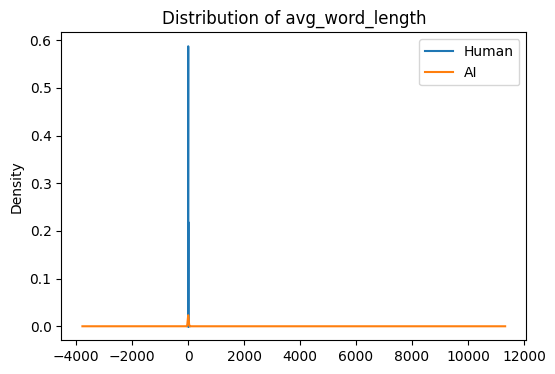

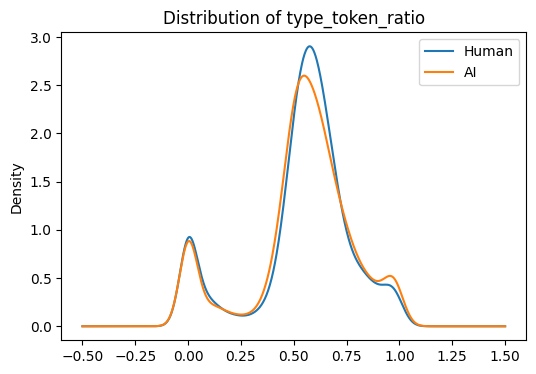

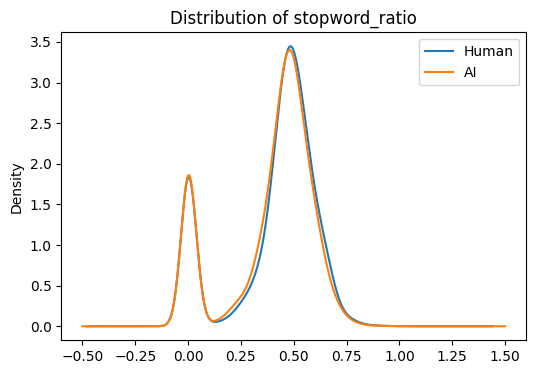

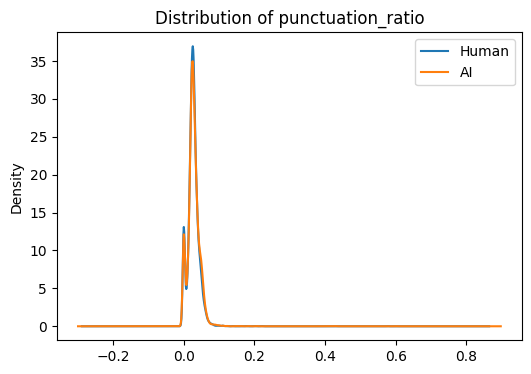

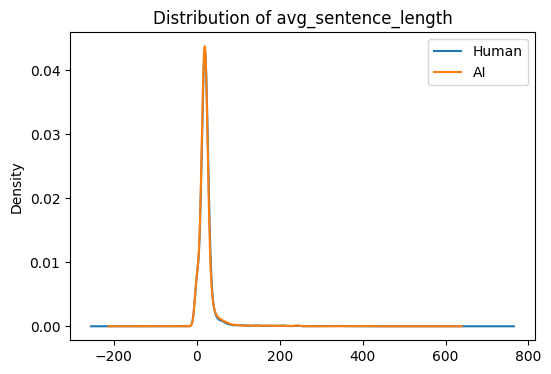

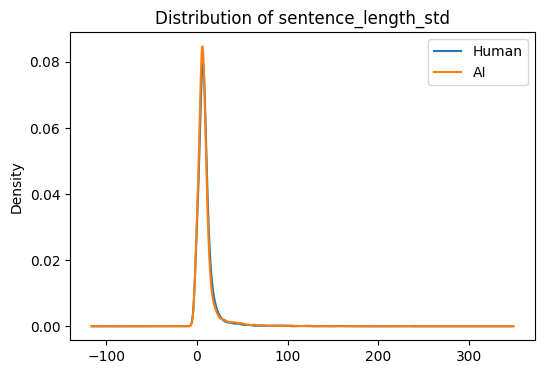

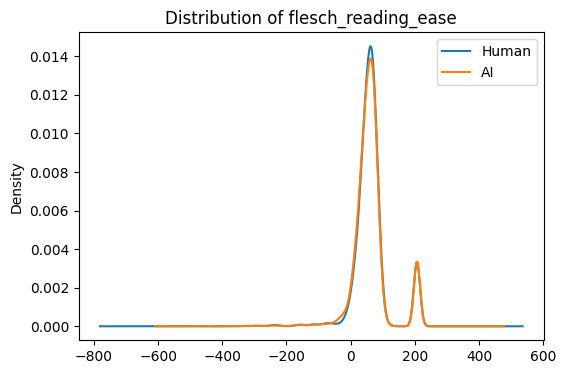

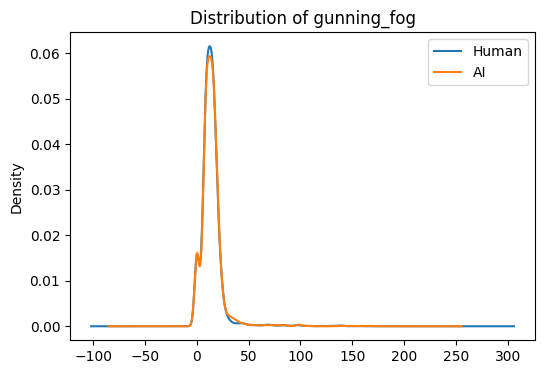

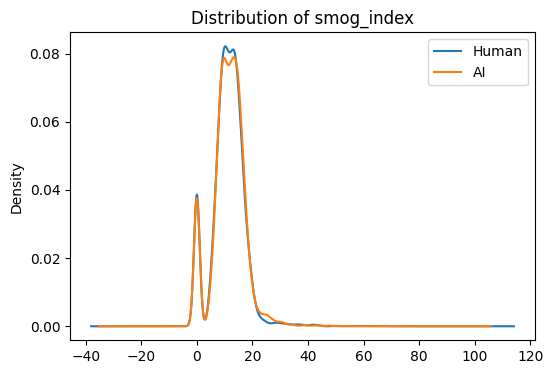

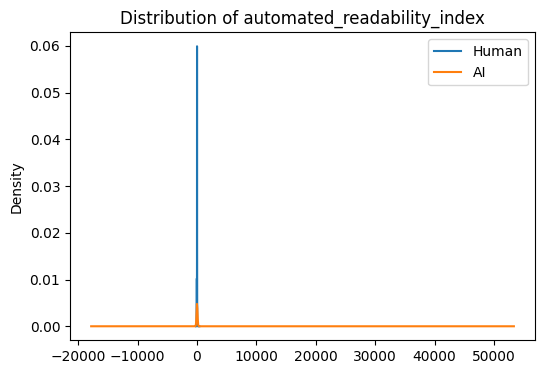

In [4]:
import matplotlib.pyplot as plt

for col in features:
    plt.figure(figsize=(6,4))
    df[df["is_ai"]==0][col].plot(kind="kde", label="Human")
    df[df["is_ai"]==1][col].plot(kind="kde", label="AI")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()


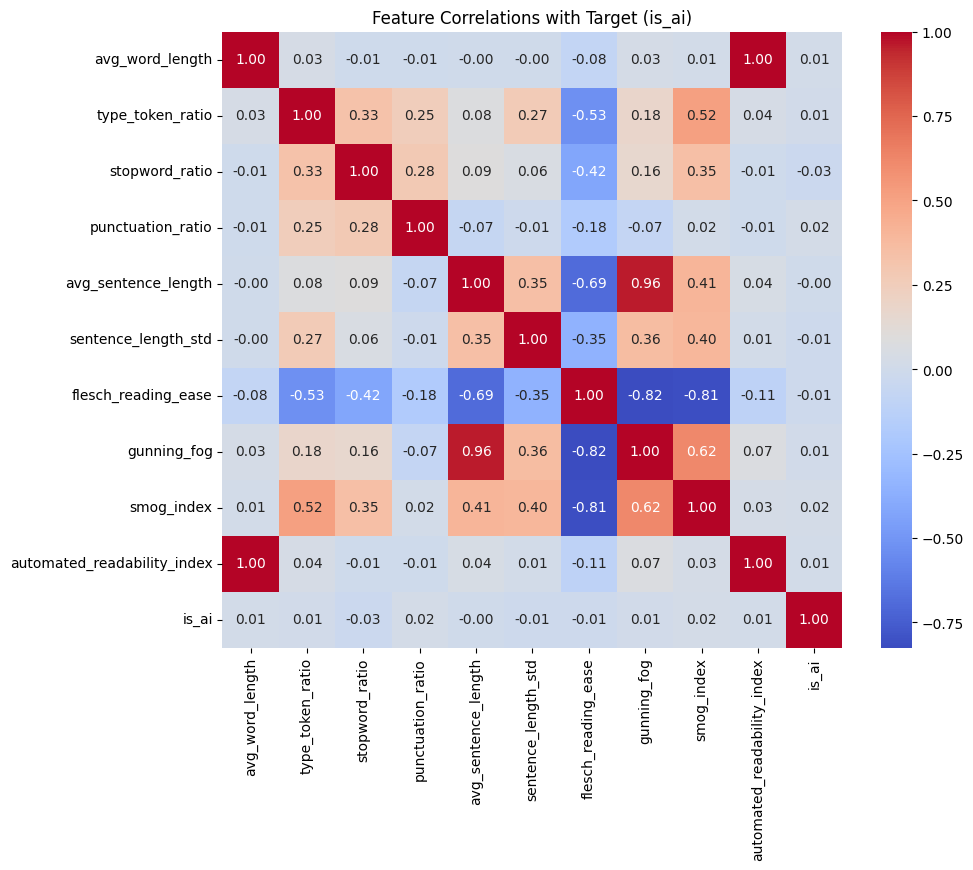

In [5]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr = df[features + ["is_ai"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Target (is_ai)")
plt.show()
